In [30]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("../../../../data/train/train.csv")
test = pd.read_csv("../../../../data/test/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(9557, 143)
(23856, 142)


In [4]:
train.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
items = train["Target"].value_counts().to_dict().items()
items.sort(key=lambda p: p[0])
items

[(1L, 755L), (2L, 1597L), (3L, 1209L), (4L, 5996L)]

In [22]:
ticks = map(lambda p: p[0], items)
count = map(lambda p: p[1], items)
ind = np.arange(len(ticks))
sum_count = sum(count)
percentage_count = map(lambda p: 100*p/sum_count, count)

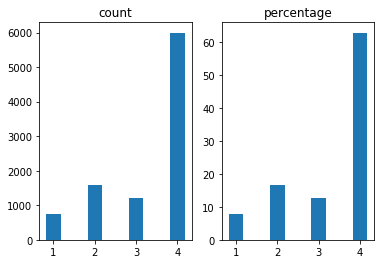

In [25]:
width = 0.35
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].bar(range(len(ind)), count, width)
ax[0].set_xticks(ind+0.0*width)
ax[0].set_xticklabels(ticks)
ax[0].set_title("count")

ax[1].bar(range(len(ind)), percentage_count, width)
ax[1].set_xticks(ind+0.0*width)
ax[1].set_xticklabels(ticks)
ax[1].set_title("percentage")

plt.show()

## t-distributed Stochastic Neighbor Embedding

### Categorical variables

In [31]:
categorical_colums = open("../../resources/categoricalFeatures", "r").read().split(",")
# categorical_colums

In [32]:
X_embeded = TSNE(n_components=2).fit_transform(train[categorical_colums])

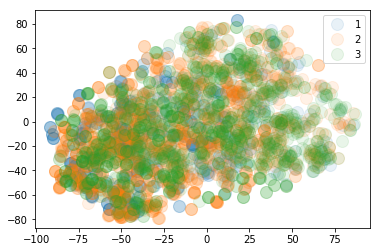

In [63]:
groups = data.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name, alpha=0.1)
ax.legend()

plt.show()

### Continuous variables

In [66]:
continuous_colums = open("../../resources/continuousFeatures", "r").read().split(",")
# categorical_colums

In [67]:
X_embeded = TSNE(n_components=2).fit_transform(train[continuous_colums])

ValueError: could not convert string to float: no

In [68]:
train[continuous_colums]

,v2a1,rooms,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,3,NaN,0,1,1,0,0,0,0,...,43,100,1849,1,100,0,1.000000,0.000000,100.000000,1849
1,135000.0,4,1.0,0,1,1,0,0,0,0,...,67,144,4489,1,144,0,1.000000,64.000000,144.000000,4489
2,NaN,8,NaN,0,0,0,0,1,1,0,...,92,121,8464,1,0,0,0.250000,64.000000,121.000000,8464
3,180000.0,5,1.0,0,2,2,1,1,2,1,...,17,81,289,16,121,4,1.777778,1.000000,121.000000,289
4,180000.0,5,1.0,0,2,2,1,1,2,1,...,37,121,1369,16,121,4,1.777778,1.000000,121.000000,1369
5,180000.0,5,1.0,0,2,2,1,1,2,1,...,38,121,1444,16,121,4,1.777778,1.000000,121.000000,1444
6,180000.0,5,1.0,0,2,2,1,1,2,1,...,8,4,64,16,121,4,1.777778,1.000000,121.000000,64
7,130000.0,2,NaN,0,1,1,2,1,3,2,...,7,0,49,16,81,4,16.000000,1.000000,100.000000,49
8,130000.0,2,NaN,0,1,1,2,1,3,2,...,30,81,900,16,81,4,16.000000,1.000000,100.000000,900
9,130000.0,2,NaN,0,1,1,2,1,3,2,...,28,121,784,16,81,4,16.000000,1.000000,100.000000,784


In [69]:
train[continuous_colums].describe()

,v2a1,rooms,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,2.697000e+03,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000
mean,1.652316e+05,4.955530,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,...,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302
std,1.504571e+05,1.468381,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,...,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050
min,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
25%,8.000000e+04,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,17.000000,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000
50%,1.300000e+05,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,...,31.000000,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000
75%,2.000000e+05,6.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,...,51.000000,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000
max,2.353477e+06,11.000000,6.000000,5.000000,8.000000,8.000000,6.000000,6.000000,8.000000,7.000000,...,97.000000,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000
